In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
import os
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, HistGradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
os.chdir('C:\\Users\\DELL\\Desktop\\DS-Assignment')

# Importing data

In [3]:
data = pd.read_excel("DS - Assignment Part 1 data set.xlsx")

In [4]:
data

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1
...,...,...,...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381,3,803,15.4
410,2012.666667,5.6,90.45606,9,24.97433,121.54310,2,1278,50.0
411,2013.250000,18.8,390.96960,7,24.97923,121.53986,1,503,40.6
412,2013.000000,8.1,104.81010,5,24.96674,121.54067,1,597,52.5


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Transaction date                          414 non-null    float64
 1   House Age                                 414 non-null    float64
 2   Distance from nearest Metro station (km)  414 non-null    float64
 3   Number of convenience stores              414 non-null    int64  
 4   latitude                                  414 non-null    float64
 5   longitude                                 414 non-null    float64
 6   Number of bedrooms                        414 non-null    int64  
 7   House size (sqft)                         414 non-null    int64  
 8   House price of unit area                  414 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 29.2 KB


In [6]:
data.describe()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000


## Data Cleaning

In [7]:
data["Transaction date"] = data['Transaction date'].astype(str).apply(lambda x: x.split('.')[0]).astype(int)

In [8]:
data.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [9]:
data["House Age"] = np.ceil(data["House Age"]).astype(int)

In [10]:
data.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012,32,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012,20,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013,14,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013,14,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012,5,390.56840,5,24.97937,121.54245,1,491,43.1


In [11]:
data["Total House Price"]= data['House price of unit area']*data['House size (sqft)']

In [12]:
data.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area,Total House Price
0,2012,32,84.87882,10,24.98298,121.54024,1,575,37.9,21792.5
1,2012,20,306.59470,9,24.98034,121.53951,2,1240,42.2,52328.0
2,2013,14,561.98450,5,24.98746,121.54391,3,1060,47.3,50138.0
3,2013,14,561.98450,5,24.98746,121.54391,2,875,54.8,47950.0
4,2012,5,390.56840,5,24.97937,121.54245,1,491,43.1,21162.1


# Exploratory Data Analysis [EDA]

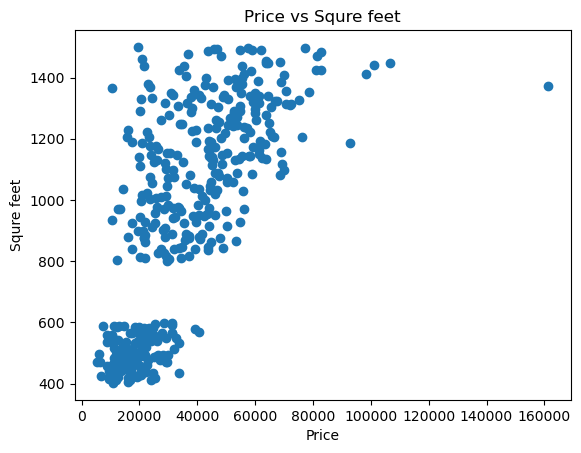

In [13]:
price = data['House price of unit area']*data['House size (sqft)']
size_sqft = data['House size (sqft)']
plt.scatter(price, size_sqft)
plt.title('Price vs Squre feet')
plt.xlabel('Price')
plt.ylabel('Squre feet')
plt.show()

<Figure size 1000x1000 with 0 Axes>

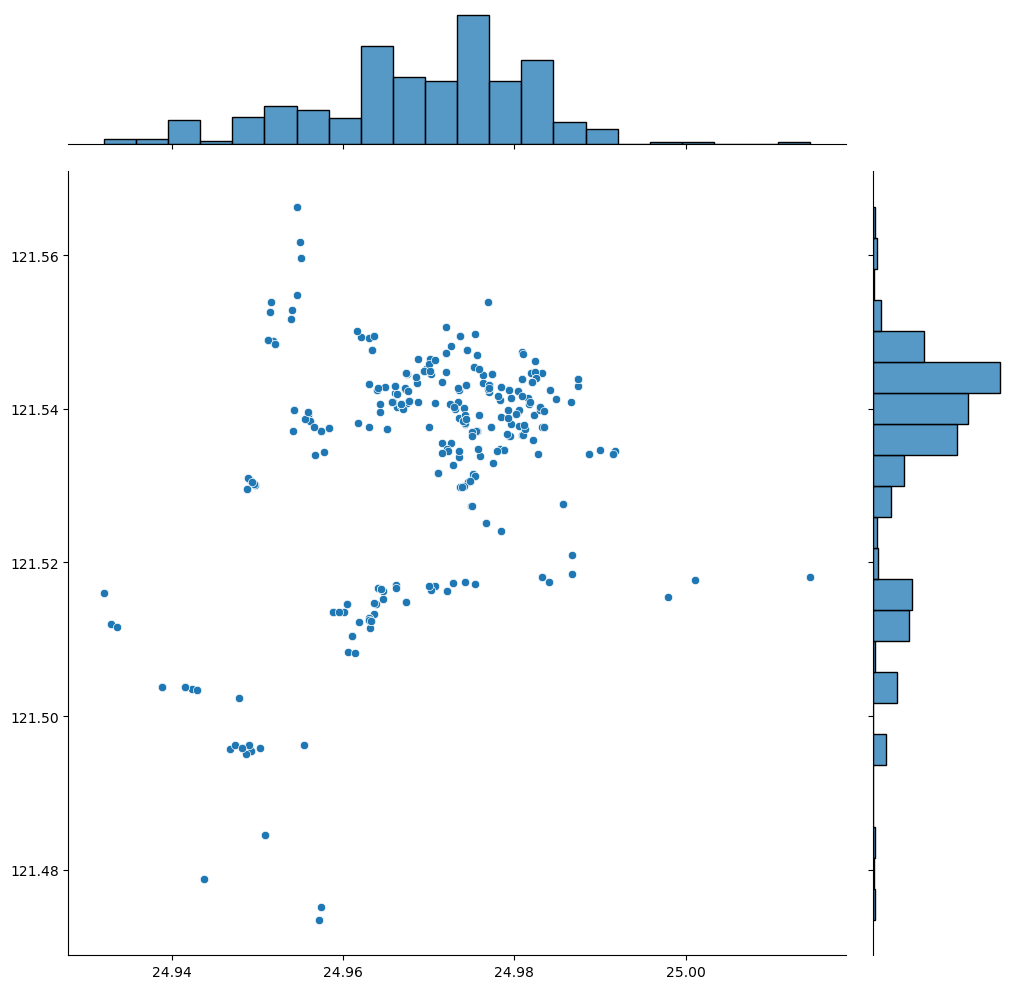

In [14]:
plt.figure(figsize=(10,10))
sns.jointplot(x=data.latitude.values, y=data.longitude.values, height=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.show()

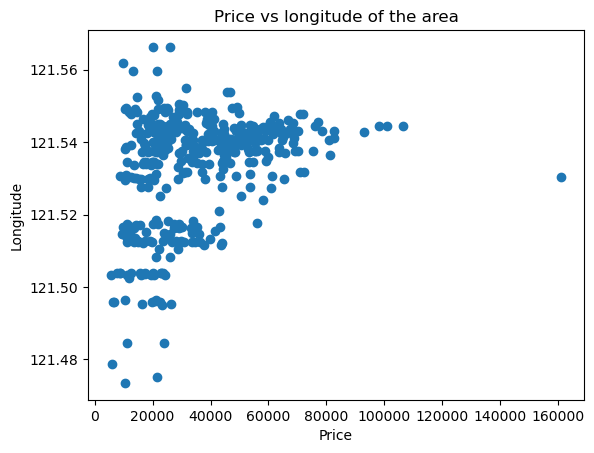

In [15]:
plt.scatter(price, data.longitude)
plt.title('Price vs longitude of the area')
plt.xlabel('Price')
plt.ylabel('Longitude')
plt.show()

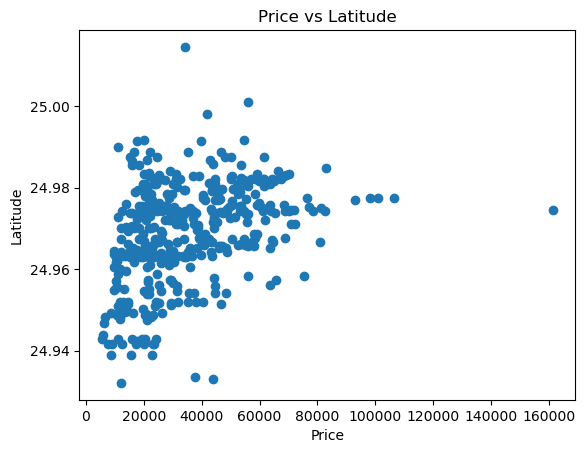

In [16]:
plt.scatter(price, data.latitude)
plt.title('Price vs Latitude')
plt.xlabel('Price')
plt.ylabel('Latitude')
plt.show()

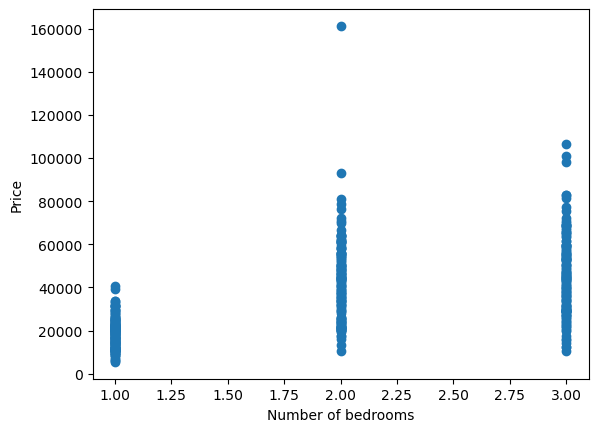

In [17]:
plt.scatter(data['Number of bedrooms'], price)
plt.xlabel('Number of bedrooms')
plt.ylabel('Price')
plt.show()

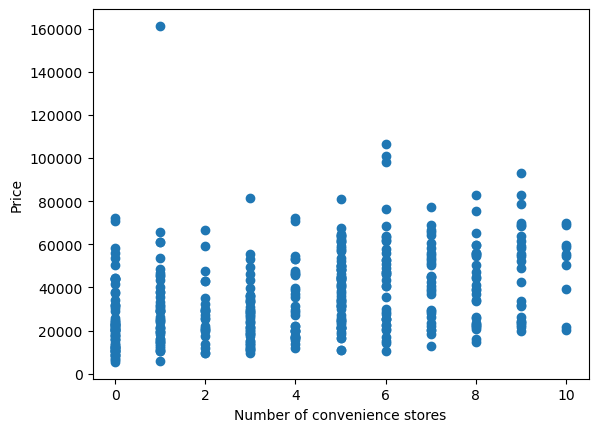

In [18]:
plt.scatter(data['Number of convenience stores'], price)
plt.xlabel('Number of convenience stores')
plt.ylabel('Price')
plt.show()

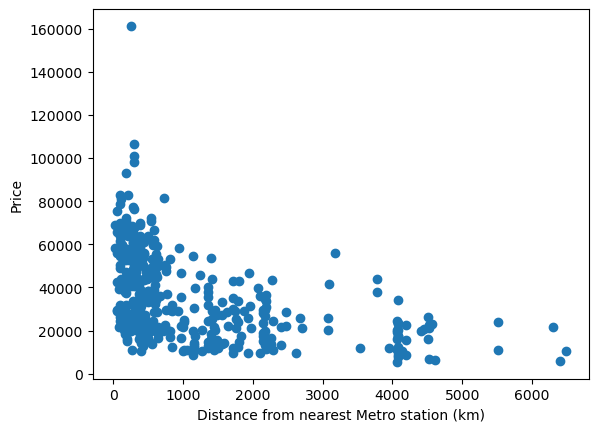

In [19]:
plt.scatter(data['Distance from nearest Metro station (km)'], price)
plt.xlabel('Distance from nearest Metro station (km)')
plt.ylabel('Price')
plt.show()

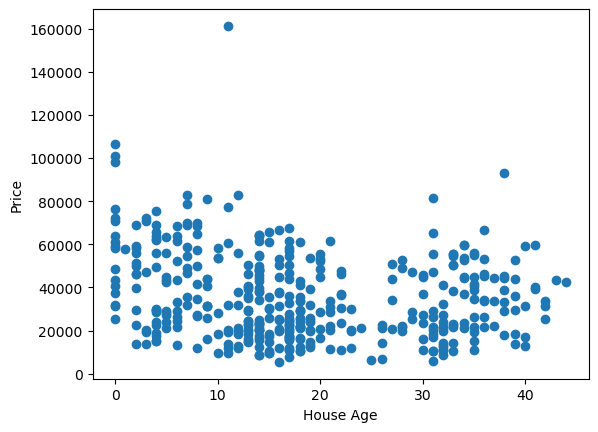

In [20]:
plt.scatter(data['House Age'], price)
plt.xlabel('House Age')
plt.ylabel('Price')
plt.show()

array([[<AxesSubplot:title={'center':'Transaction date'}>,
        <AxesSubplot:title={'center':'House Age'}>,
        <AxesSubplot:title={'center':'Distance from nearest Metro station (km)'}>],
       [<AxesSubplot:title={'center':'Number of convenience stores'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>],
       [<AxesSubplot:title={'center':'Number of bedrooms'}>,
        <AxesSubplot:title={'center':'House size (sqft)'}>,
        <AxesSubplot:title={'center':'House price of unit area'}>],
       [<AxesSubplot:title={'center':'Total House Price'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

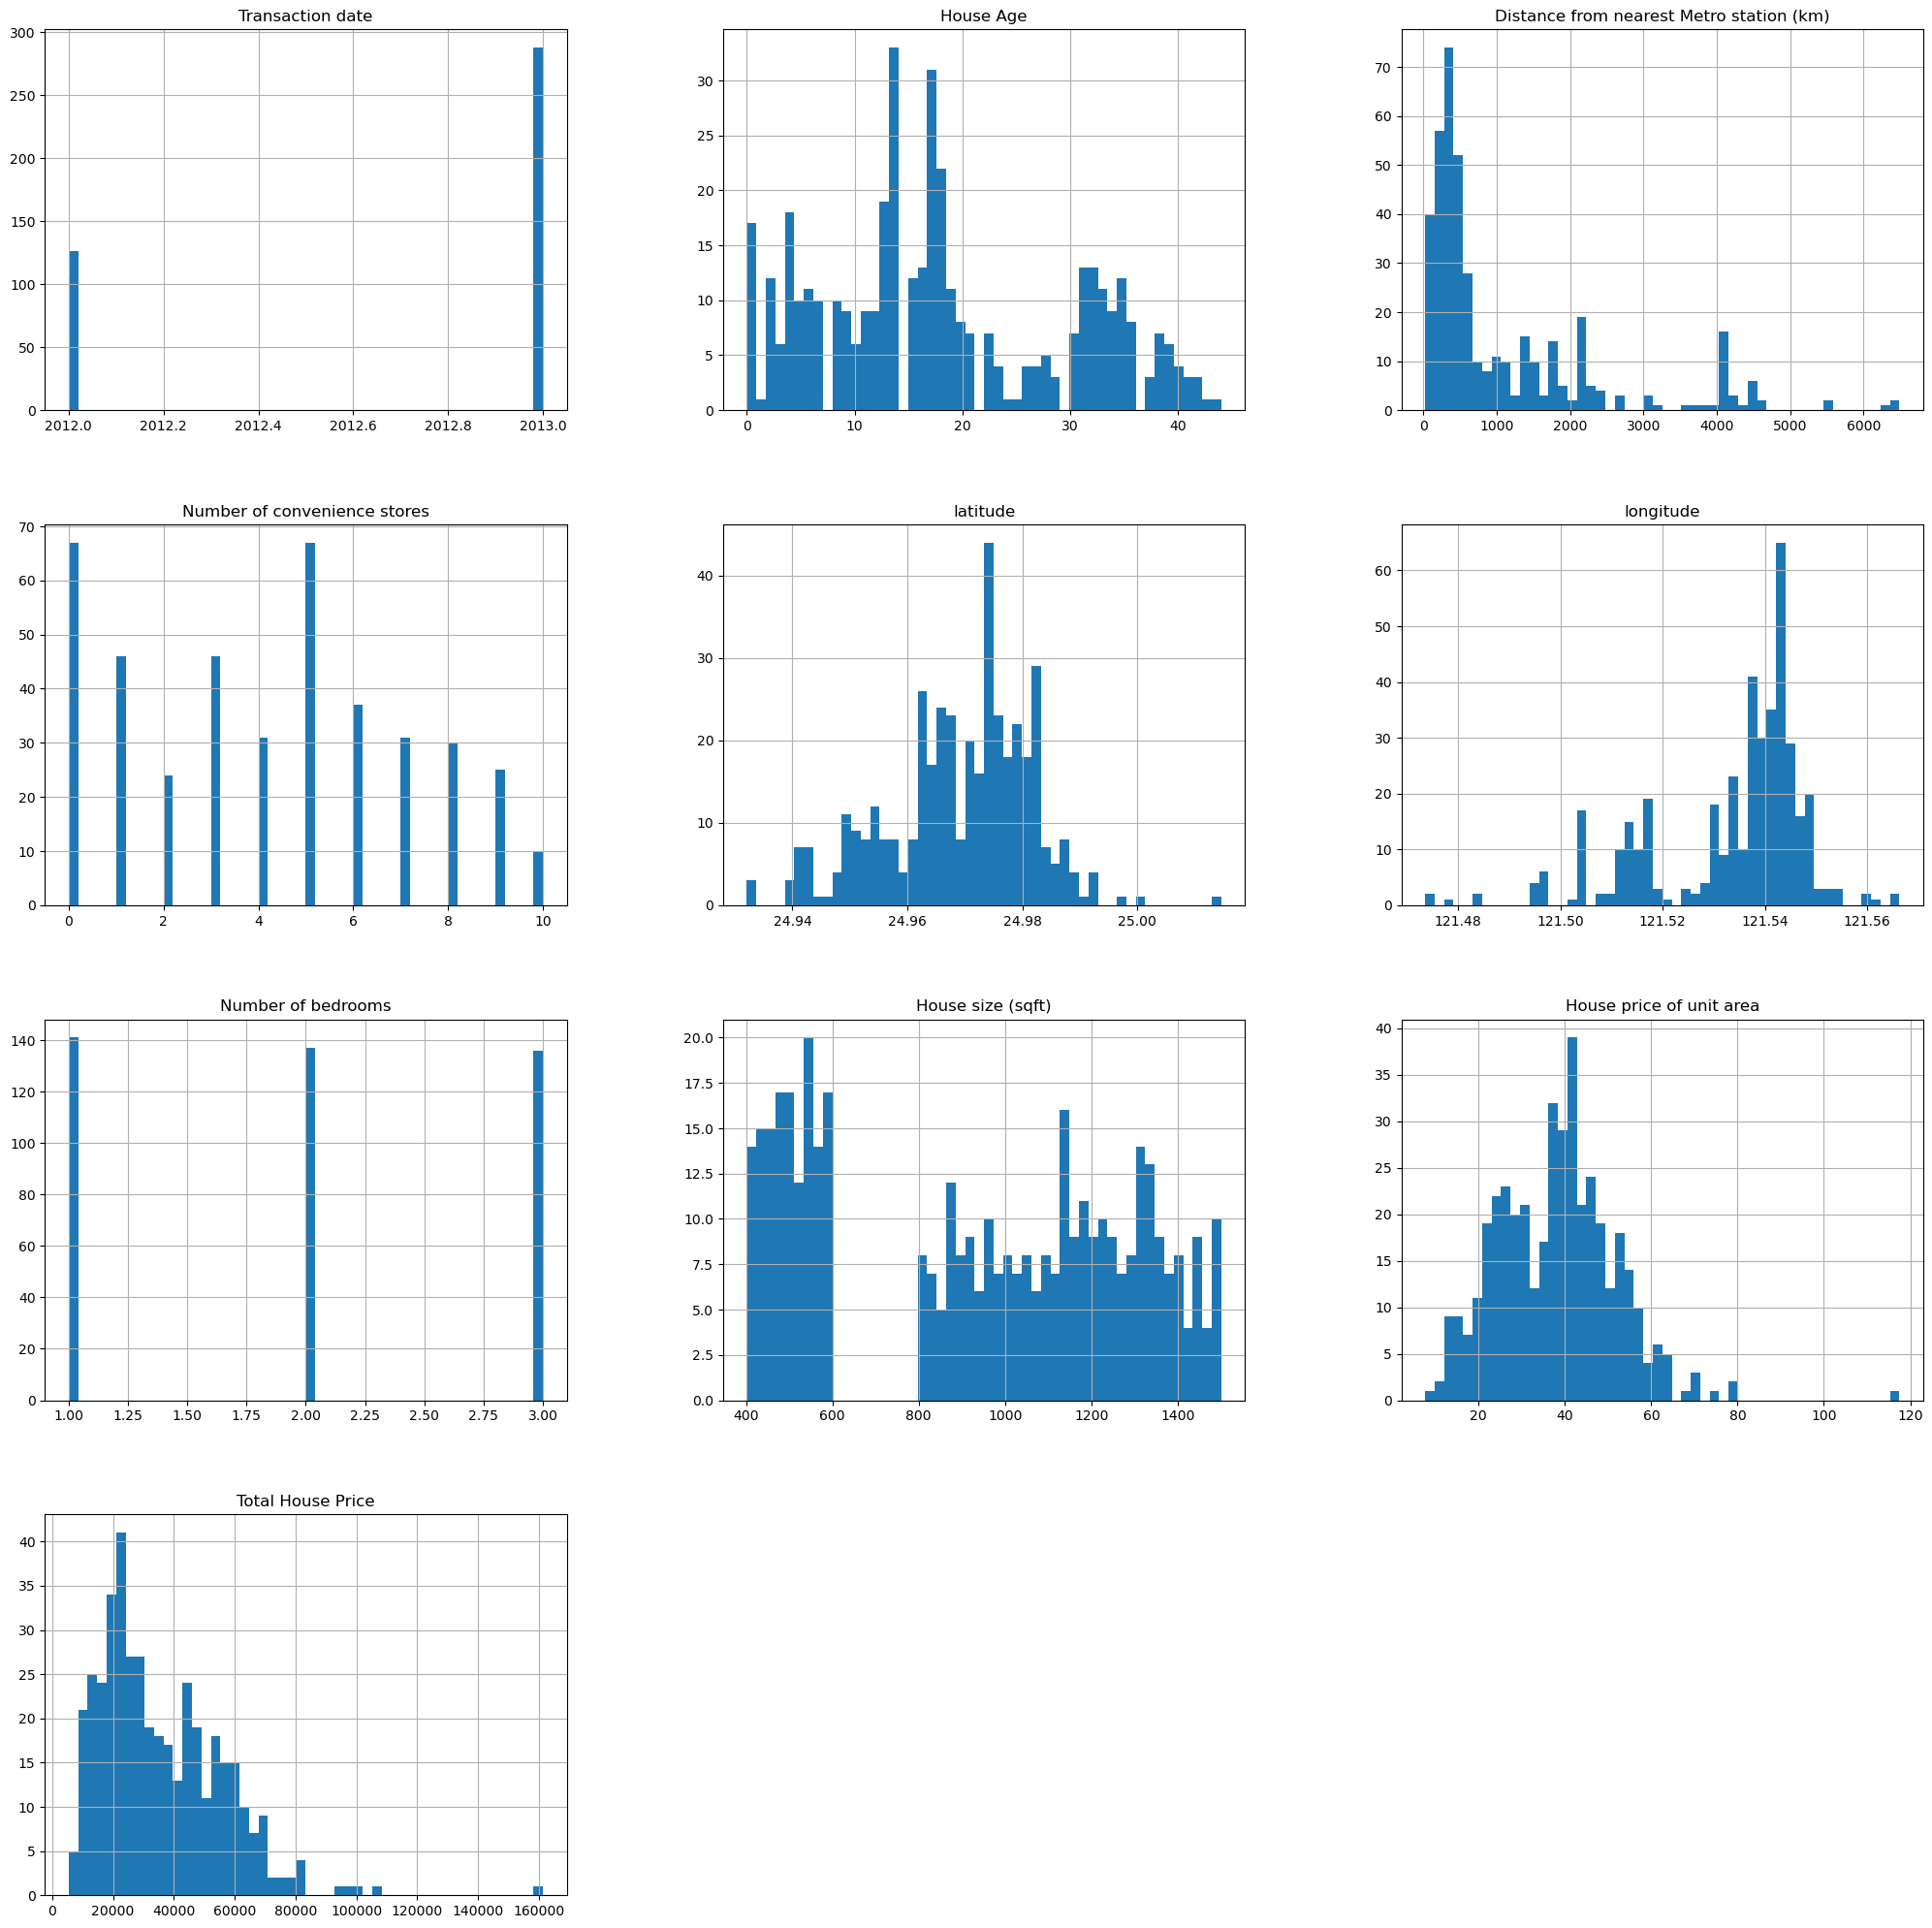

In [21]:
data.hist(figsize=(25,25),bins=50)

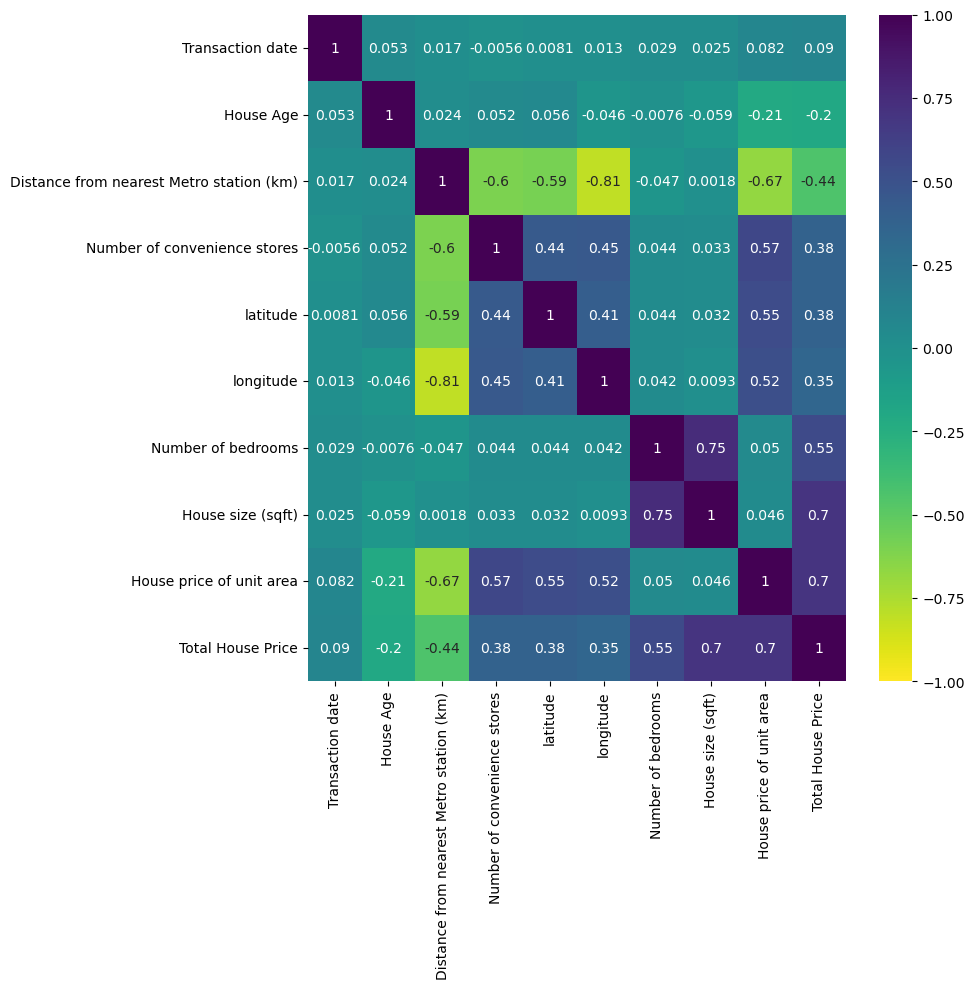

In [22]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,cmap='viridis_r',vmin=-1,vmax=1)
plt.tight_layout()

# Training the Model

In [23]:
X = data.drop(columns = ["House price of unit area", "Total House Price"], axis=1)
y = data["House price of unit area"]

##### Splitting the Dataset

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)

##### Standardizing the dataset

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
def fit_and_test_model(models, test_features, test_labels):
    scores = pd.DataFrame()
    for model in models:
        model.fit(X_train, y_train)
        predictions = model.predict(test_features)
        mae = round(mean_absolute_error(test_labels, predictions), 4)
        mse = round(mean_squared_error(test_labels, predictions), 4)
        rmse= round(np.sqrt(mean_squared_error(test_labels, predictions)), 4)
        r2 = round(r2_score(test_labels, predictions), 4)
        errors = abs(predictions - test_labels)
        mape = 100 * np.mean(errors / test_labels)
        accuracy = round(100 - mape, 4)
        scores[str(model)] = [mae, mse, rmse, r2, accuracy]
    scores.index = ['MAE', 'MSE', 'RMSE', 'R^2_Score', 'Accuracy(%)']
    scores.columns = ['Linear Regression', 'Random Forest Regressor', 'Extreme Gradient Boostig', 'ExtraTreesRegressor', 'HistGradientBoostingRegressor', 'KNeighborsRegressor', 'LGBMRegressor' ,'DecisionTreeRegressor'  ]
    return scores.T

In [27]:
models = [LinearRegression(), RandomForestRegressor(), XGBRegressor(), ExtraTreesRegressor(), HistGradientBoostingRegressor(), KNeighborsRegressor(), LGBMRegressor(), DecisionTreeRegressor()]
fit_and_test_model(models, X_test, y_test)

,MAE,MSE,RMSE,R^2_Score,Accuracy(%)
Linear Regression,5.4288,48.7106,6.9793,0.6737,85.1058
Random Forest Regressor,3.9542,26.0334,5.1023,0.8256,89.5703
Extreme Gradient Boostig,4.3809,33.1137,5.7545,0.7782,88.2710
ExtraTreesRegressor,3.6844,22.4035,4.7332,0.8499,90.1680
HistGradientBoostingRegressor,3.8521,26.5601,5.1537,0.8221,90.0640
KNeighborsRegressor,5.1342,40.2717,6.3460,0.7302,86.8882
LGBMRegressor,4.0267,28.2052,5.3109,0.8111,89.5642
DecisionTreeRegressor,5.0482,44.7952,6.6929,0.6999,86.5189


# Model Comparison 

### Cross Validation

In [28]:
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
def comparison(models, X, y, cv):
    cv_accs = pd.DataFrame()
    maes = []
    mses = []
    rmses = []
    r2s = []
    accs = []
    for model in models:
        mae = -np.round(cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv), 4)
        maes.append(mae)
        mae_avg = round(mae.mean(), 4)
        mse = -np.round(cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv), 4)
        mses.append(mse)
        mse_avg = round(mse.mean(), 4)
        rmse = -np.round(cross_val_score(model, X, y, scoring='neg_root_mean_squared_error', cv=cv), 4)
        rmses.append(rmse)
        rmse_avg = round(rmse.mean(), 4)
        r2 = np.round(cross_val_score(model, X, y, scoring='r2', cv=cv), 4)
        r2s.append(r2)
        r2_avg = round(r2.mean(), 4)
        acc = np.round((100 - (100 * (mae * len(X))) / sum(y)), 4)
        accs.append(acc)
        acc_avg = round(acc.mean(), 4)
        cv_accs[str(model)] = [mae_avg, mse_avg, rmse_avg, r2_avg, acc_avg]
    cv_accs.index = ['MAE', 'MSE', 'RMSE', 'R^2_Score', 'Accuracy(%)']
    cv_accs.columns= ['Linear Regression', 'Random Forest Regressor', 'Extreme Gradient Boostig', 'ExtraTreesRegressor', 'HistGradientBoostingRegressor', 'KNeighborsRegressor', 'LGBMRegressor' ,'DecisionTreeRegressor']
    return cv_accs.T

In [29]:
# Put the models in a list to be used for Cross-Validation
models = [LinearRegression(), RandomForestRegressor(), XGBRegressor(), ExtraTreesRegressor(), HistGradientBoostingRegressor(), KNeighborsRegressor(), LGBMRegressor(), DecisionTreeRegressor()]

# Run the Cross-Validation comparison with the models used in this analysis
comp_dataframe = comparison(models, X_train, y_train, 5)
comp_dataframe

,MAE,MSE,RMSE,R^2_Score,Accuracy(%)
Linear Regression,6.4455,88.7928,9.2965,0.5439,82.8484
Random Forest Regressor,5.4416,78.6856,8.6415,0.6147,85.5200
Extreme Gradient Boostig,5.9298,84.9897,9.0567,0.5578,84.2208
ExtraTreesRegressor,5.3269,69.9488,8.1690,0.6478,85.8251
HistGradientBoostingRegressor,5.4685,69.1052,8.1179,0.6520,85.4483
KNeighborsRegressor,6.5143,87.4493,9.2571,0.5457,82.6653
LGBMRegressor,5.6234,71.1202,8.2576,0.6399,85.0362
DecisionTreeRegressor,7.0532,113.2309,10.6884,0.3655,81.2315


### Hyperparameter Tuning

In [30]:
#Linear Regression
grid_lr = LinearRegression()

#KNeighborsRegressor
knr = {'n_neighbors':np.arange(1, 50),'metric': ['manhattan','euclidean','minkowski','chebyshev'],'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'weights': ['uniform','distance']}  
grid_knr = GridSearchCV(KNeighborsRegressor(), param_grid=knr) 

# Decision Tree Regressor
dtr = {'criterion':["squared_error", "friedman_mse", "absolute_error","poisson"], 'max_depth':np.arange(1, 50), 'min_samples_leaf':[1,2,4,5,10,20,30,40,80,100]}
grid_dtr = GridSearchCV(DecisionTreeRegressor(), param_grid=dtr)

#Random Forest Regressor
rf = {'n_estimators':[100,200, 350,500], 'min_samples_leaf':[2, 10, 30], 'bootstrap': [True,False], 'criterion':['mse', 'mae']}
grid_rf = GridSearchCV(RandomForestRegressor(), param_grid=rf)

#Histogram Gradient Boosting Regressor
hgr = {'loss': ['squared_error', 'absolute_error', 'poisson'], 'learning_rate': [0.2,0.5,0.8,1]}
grid_hist = GridSearchCV(HistGradientBoostingRegressor(), hgr)

# Light GBM Regressor
params_lgbm = {'n_estimators': [100,300,600,900], 'learning_rate': [0.2,0.5,0.8,1]}
grid_lgbm = GridSearchCV(LGBMRegressor(), params_lgbm)

# XGBoost Regressor
params_xgb = {'n_estimators': [100,300,600,900], 'learning_rate': [0.2,0.5,0.8,1]}
grid_xgb =  GridSearchCV(XGBRegressor(), params_xgb)

#Extra Trees Regressor
params_et = {'n_estimators': [100,300,500,800,100], 'bootstrap': [True,False], 'max_features': ['sqrt','log2']}
grid_etr = GridSearchCV(ExtraTreesRegressor(), params_et)

In [31]:
# Define a function that compares all final models
def final_comparison(models, test_features, test_labels):
    scores = pd.DataFrame()
    for model in models:
        model.fit(X_train, y_train)
        predictions = model.predict(test_features)
        mae = round(mean_absolute_error(test_labels, predictions), 4)
        mse = round(mean_squared_error(test_labels, predictions), 4)
        rmse = round(np.sqrt(mean_squared_error(test_labels, predictions)),4)
        r2 = round(r2_score(test_labels, predictions), 4)
        errors = abs(predictions - test_labels)
        mape = 100 * np.mean(errors / test_labels)
        accuracy = round(100 - mape, 4)
        scores[str(model)] = [mae, mse, rmse, r2, accuracy]
    scores.index = ['Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error', 'R^2_score', 'Accuracy(%)']
    scores.columns = ['Linear Regression', 'Random Forest Regressor', 'Extreme Gradient Boostig', 'ExtraTreesRegressor', 'HistGradientBoostingRegressor', 'KNeighborsRegressor', 'LGBMRegressor' ,'DecisionTreeRegressor']
    return scores

In [32]:
models = [grid_lr, grid_rf, grid_xgb, grid_etr, grid_hist, grid_knr, grid_lgbm, grid_dtr]

# Call the comparison function with the three final models
final_scores = final_comparison(models, X_test, y_test)

In [33]:
final_scores.T

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R^2_score,Accuracy(%)
Linear Regression,5.4288,48.7106,6.9793,0.6737,85.1058
Random Forest Regressor,4.0732,28.1589,5.3065,0.8114,89.6532
Extreme Gradient Boostig,3.9831,27.3198,5.2268,0.8170,89.2791
ExtraTreesRegressor,3.5981,21.8587,4.6753,0.8536,90.4892
HistGradientBoostingRegressor,3.7659,25.1255,5.0125,0.8317,90.2260
KNeighborsRegressor,4.2656,27.9464,5.2864,0.8128,88.9343
LGBMRegressor,4.3505,33.8113,5.8147,0.7735,88.6784
DecisionTreeRegressor,4.6361,34.1276,5.8419,0.7714,87.9372


Upon completion of hyperparameter tuning of baseline models, the model which exhibits the best performance is Extra Trees Regressor. 
The ExtraTreesRegressor achieves an R-squared of 85.3% and an accuracy of 90.48% on the test set, meaning its predictions were most appropriate compare to others 